In [1]:
%matplotlib inline

import sys
sys.path.append('..')

import xarray as xr
import numpy as np
from pathlib import Path
from itertools import product
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
def plot_map(ax, ds):
    proj = ccrs.PlateCarree()
    p = ds.sst[0].plot(ax=ax,
        transform=proj,
        subplot_kws={'projection': proj},
        levels=np.arange(0,1.5,0.1),
    )
    p.axes.coastlines()

In [3]:
data_dir = Path(os.getenv("OODIR"))

In [4]:
sampling_file = xr.open_dataset(data_dir / "IQUAM" / "OutputData" / "sampling_uncertainty_2005.nc")
sampling_file.sst.values[np.isnan(sampling_file.sst.values)] = 0

sampling_file2 = xr.open_dataset(data_dir / "IQUAM" / "OutputData" / "sampling_uncertainty_2021.nc")
sampling_file2.sst.values[np.isnan(sampling_file2.sst.values)] = 0

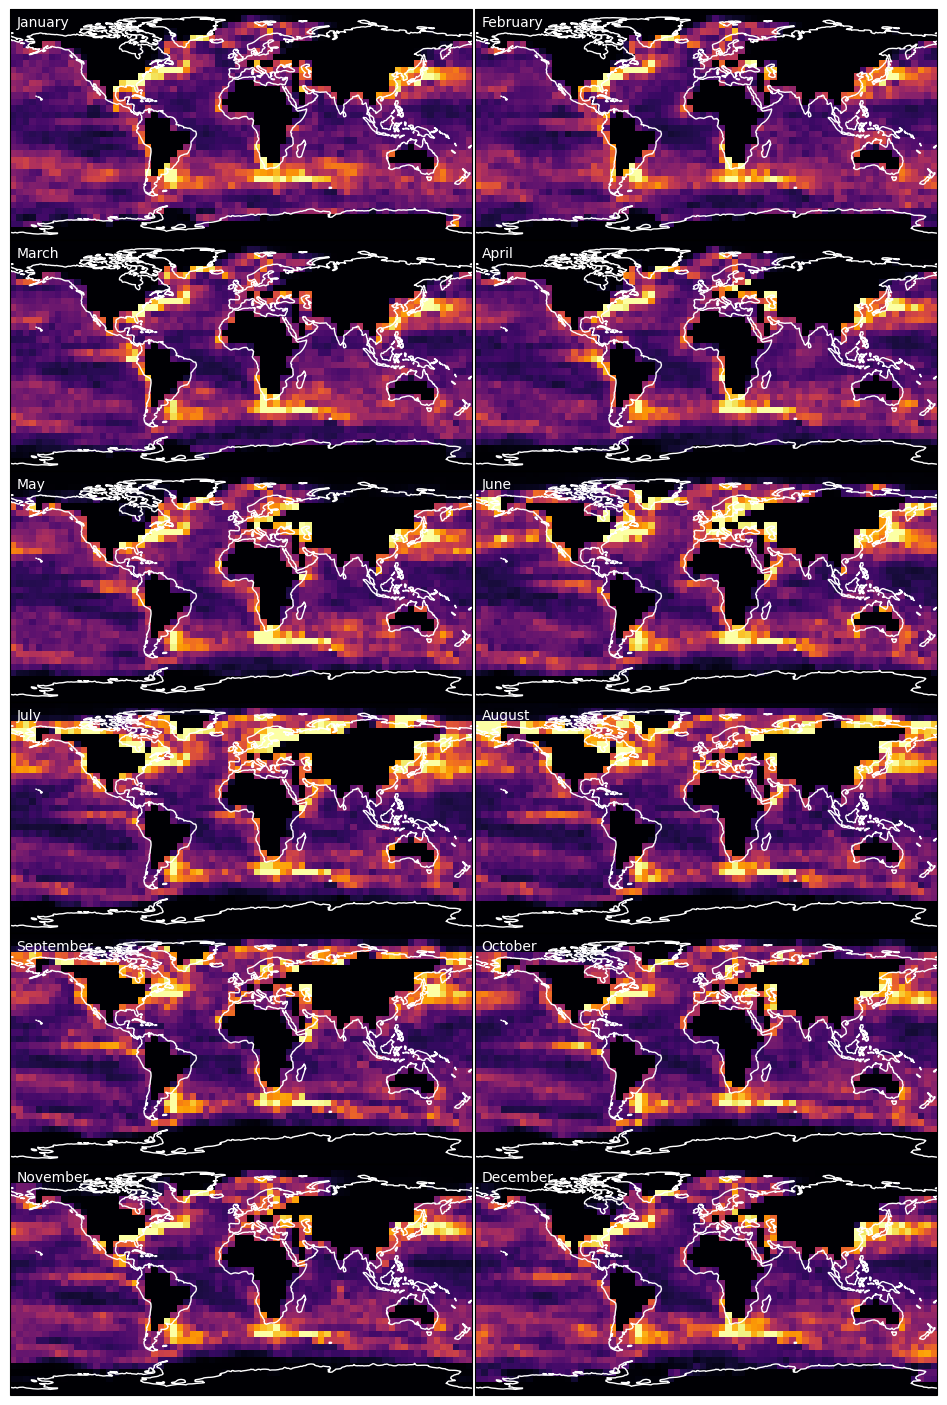

In [5]:
longitude = sampling_file.sst.longitude
latitude = sampling_file.sst.latitude
month= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,18), subplot_kw=dict(projection=ccrs.PlateCarree()))
plt.subplots_adjust(wspace=0, hspace=0)
for i, ax in zip(range(12), axes.ravel()):
    ax.coastlines(lw=1, color='w')
    x = ax.pcolormesh(longitude, latitude, sampling_file.sst[i], vmin=0.0, vmax=1.5, cmap='inferno')
    ax.text(-175, 77, month[i], color='white')

The value I get for the sampling uncertainty depends on the year I used. The plots below show the difference between sampling uncertainties estimated for two years (2005 and 2021). Some of this is just sampling - I am doing things randomly after all - but in some cases, there will be transient features that are inherently harder or easier to sample.

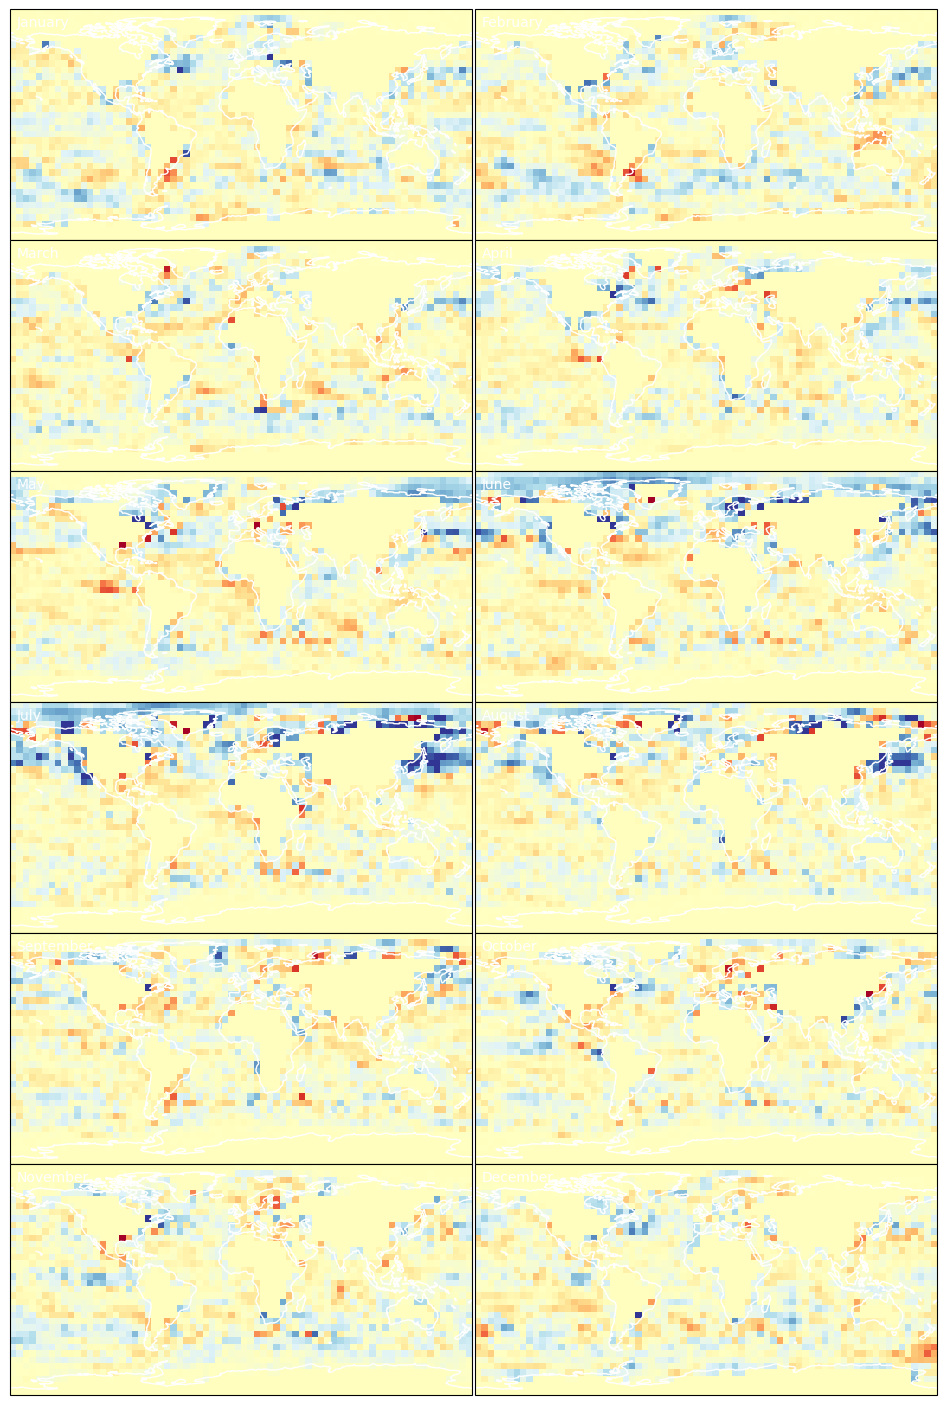

In [6]:
longitude = sampling_file.sst.longitude
latitude = sampling_file.sst.latitude
month= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(12,18), subplot_kw=dict(projection=ccrs.PlateCarree()))
plt.subplots_adjust(wspace=0, hspace=0)
for i, ax in zip(range(12), axes.ravel()):
    ax.coastlines(lw=1, color='w')
    x = ax.pcolormesh(longitude, latitude, (sampling_file.sst[i]-sampling_file2.sst[i]), vmin=-1, vmax=1, cmap='RdYlBu_r')
    ax.text(-175, 77, month[i], color='white')